4.2.2.   Пример: сходимость пуассоновских 
случайных переменных

In [10]:
import pymc as pm
import numpy as np
samples = pm.rpoisson(4.5, 100000)
N_samples = range(1,100000,100)
partial_average = [samples[:i].mean() for i in N_samples]
array_of_ones = np.ones_like(partial_average)
len(array_of_ones)

1000

In [18]:
#  numpy.ones_like(a, dtype=None, order='K', subok=True, shape=None)
#  Return an array of ones with the same shape and type as a given array.

x = np.arange(6)
x = x.reshape((2, 3))

print(x)
print(np.ones_like(x))
print('-----------------')
# =====================================
y = np.arange(3, dtype=float)
print(y)
print(np.ones_like(y))

print(x.data)

[[0 1 2]
 [3 4 5]]
[[1 1 1]
 [1 1 1]]
-----------------
[0. 1. 2.]
[1. 1. 1.]


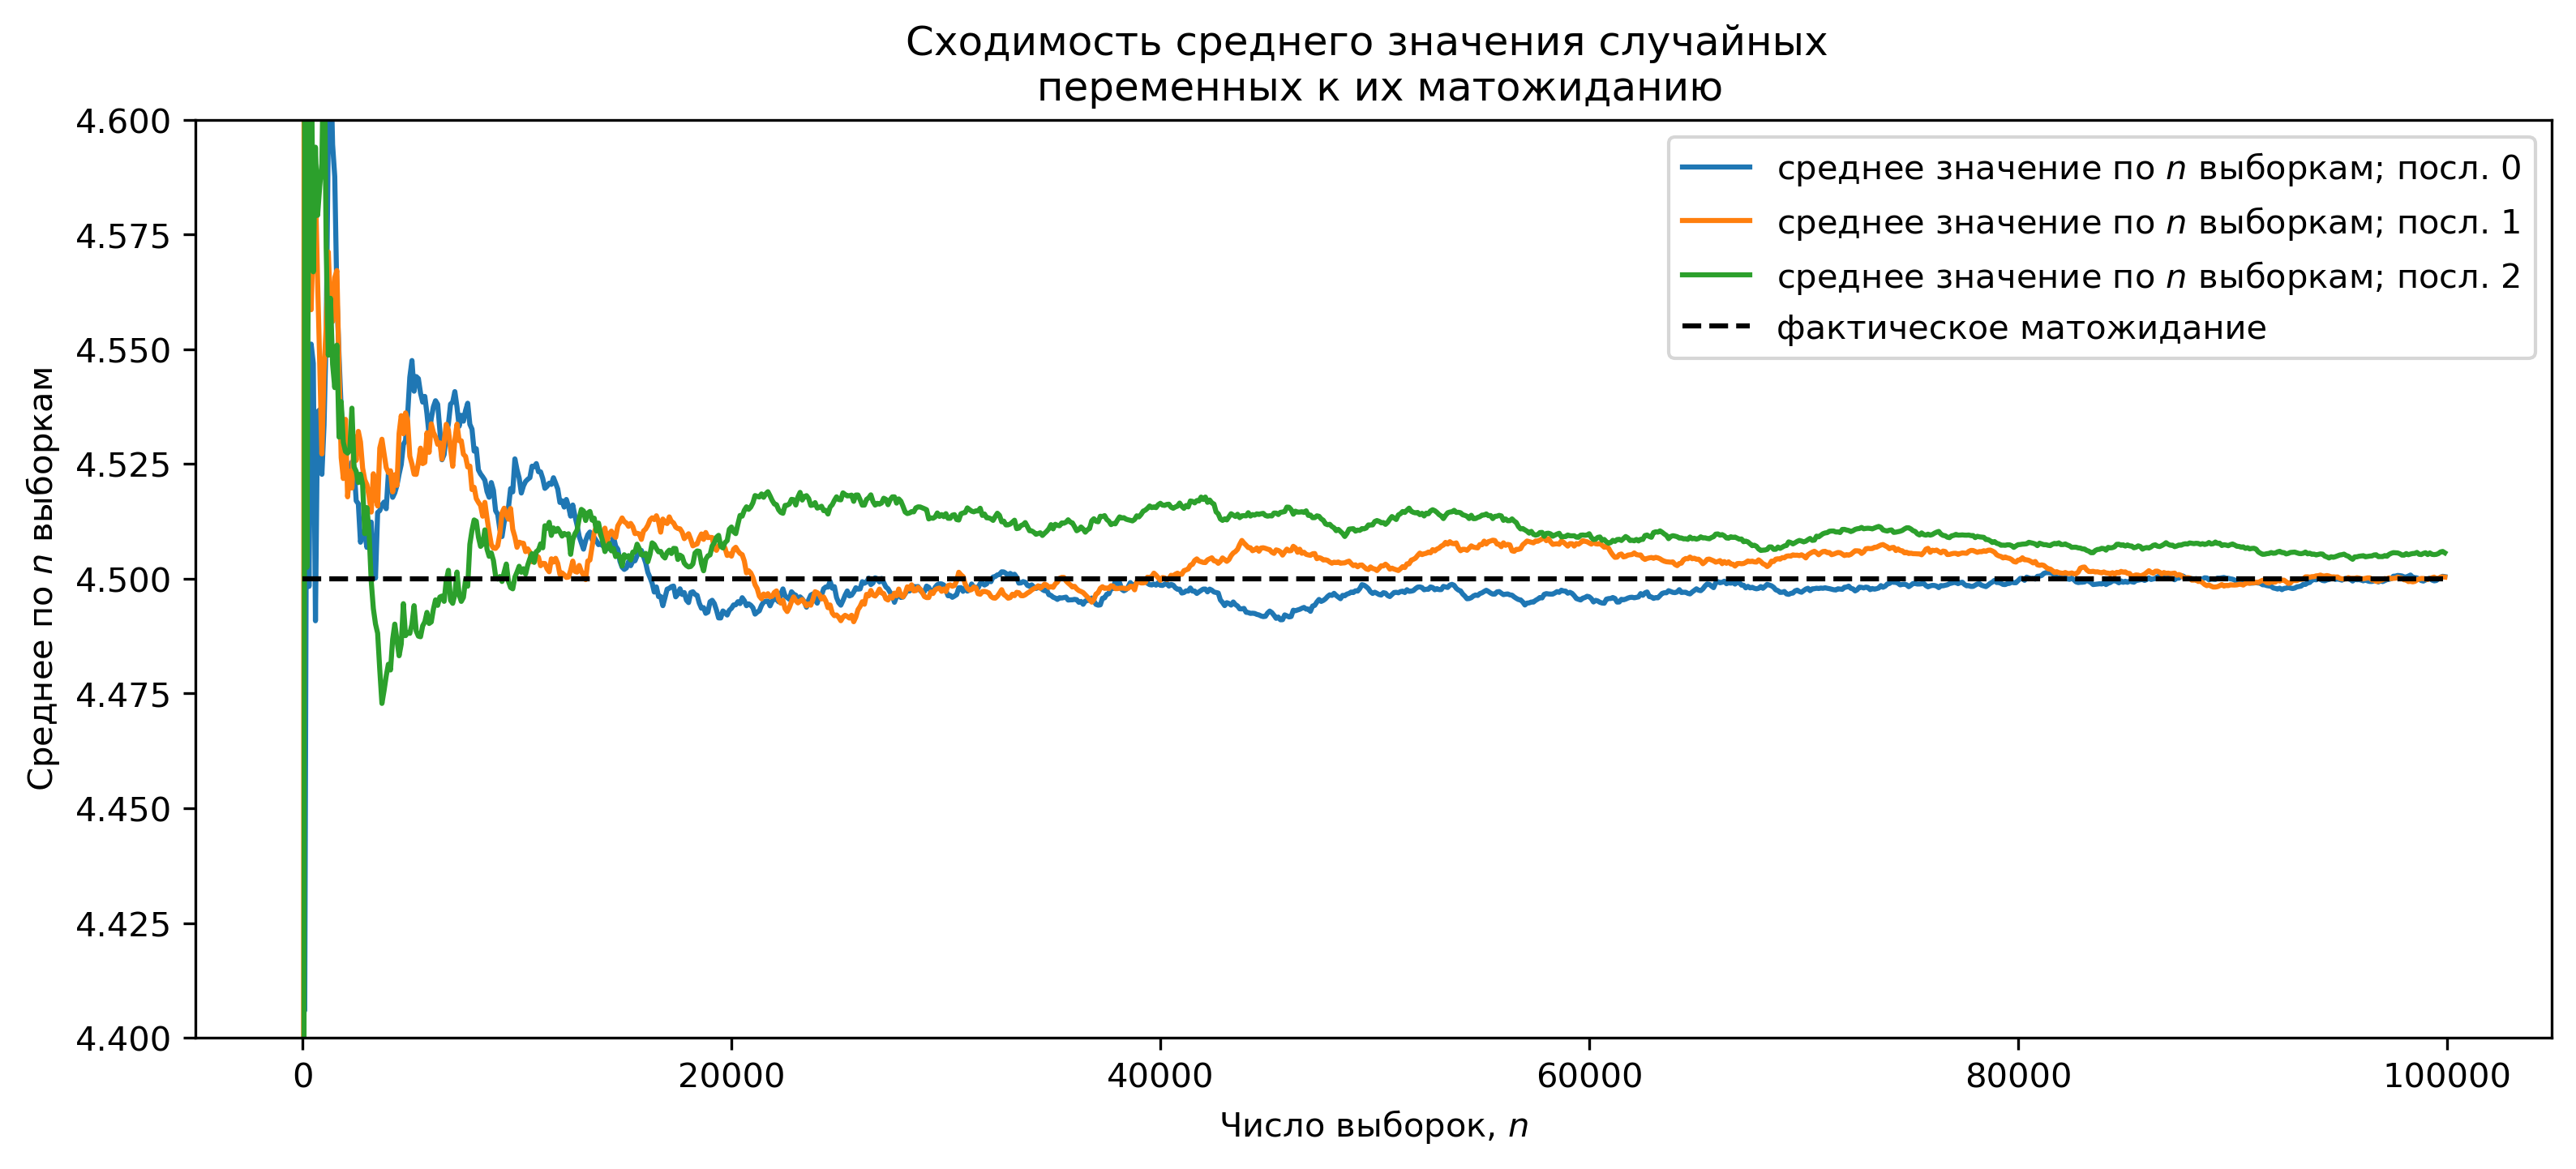

In [21]:
%matplotlib inline
import numpy as np
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
figsize(12.5, 5)
import pymc as pm

sample_size = 100000
expected_value = lambda_ = 4.5
#poi = pm.rpoisson
N_samples = range(1,100000,100)

for k in range(3):
    samples = pm.rpoisson(4.5, 100000) # вектор сл.чисел Пуассона. pm.rpoisson (mu, size) = np.random.poisson(mu, size) генератор сл. чисел из распределения Пуассона
    #print(len(samples))
    partial_average = [samples[:i].mean() for i in N_samples] # 1000 средних значений нарастающим итогом: 
    # сначала первых ста значений выборки, потом 2ста, 3сот и т.д. до средней всей выборки
    # строим график вектора средних
    plt.plot(N_samples, partial_average, lw=1.5,label=u"среднее значение по $n$ выборкам; посл. %d"%k)

plt.plot(N_samples, expected_value*np.ones_like(partial_average), # метод np.ones_like превращает вектор средних в единичный вектор
         ls="--", label=u"фактическое матожидание", c="k")
plt.ylim(4.4, 4.60)
plt.title(u"Сходимость среднего значения случайных \n переменных к их матожиданию")
plt.ylabel(u"Среднее по $n$ выборкам")
plt.xlabel(u"Число выборок, $n$")
plt.legend();

In [19]:
?? pm.rpoisson

Отступление. Генерация случайного 2-го массива и операции с его элементами

In [34]:
N1 = 10
N2 = 5

expected_value = lambda_ = 4.5
Z = pm.rpoisson(lambda_, size = (N1, N2)) # генерация случайного массива N1 Х N2
print(Z)
print('----------------------------------')
average_Z = Z.mean(axis=0) # считаем средние по всем столбцам (axis=0)
print(average_Z)
print('----------------------------------')
print((average_Z - expected_value)**2)
print('----------------------------------')
np.sqrt(((average_Z - expected_value)**2).mean())

[[5 5 7 3 3]
 [6 4 7 4 6]
 [4 5 2 3 5]
 [5 1 3 5 7]
 [5 1 5 5 3]
 [4 1 6 3 2]
 [4 6 2 4 6]
 [2 5 1 9 3]
 [7 5 3 9 4]
 [4 4 3 3 4]]
----------------------------------
[4.6 3.7 3.9 4.8 4.3]
----------------------------------
[0.01 0.64 0.36 0.09 0.04]
----------------------------------


0.4774934554525328

Отступление. Использование функции enumerate()

In [35]:
scores = [54,67,48,99,27]
for i, score in enumerate(scores):
   print(i, score)

0 54
1 67
2 48
3 99
4 27


In [36]:
scores = [54,67,48,99,27]
for i, score in enumerate(scores, 1):
   print(i, score)

1 54
2 67
3 48
4 99
5 27


Считаем расстояние от выборочного среднего до фактического среднего 

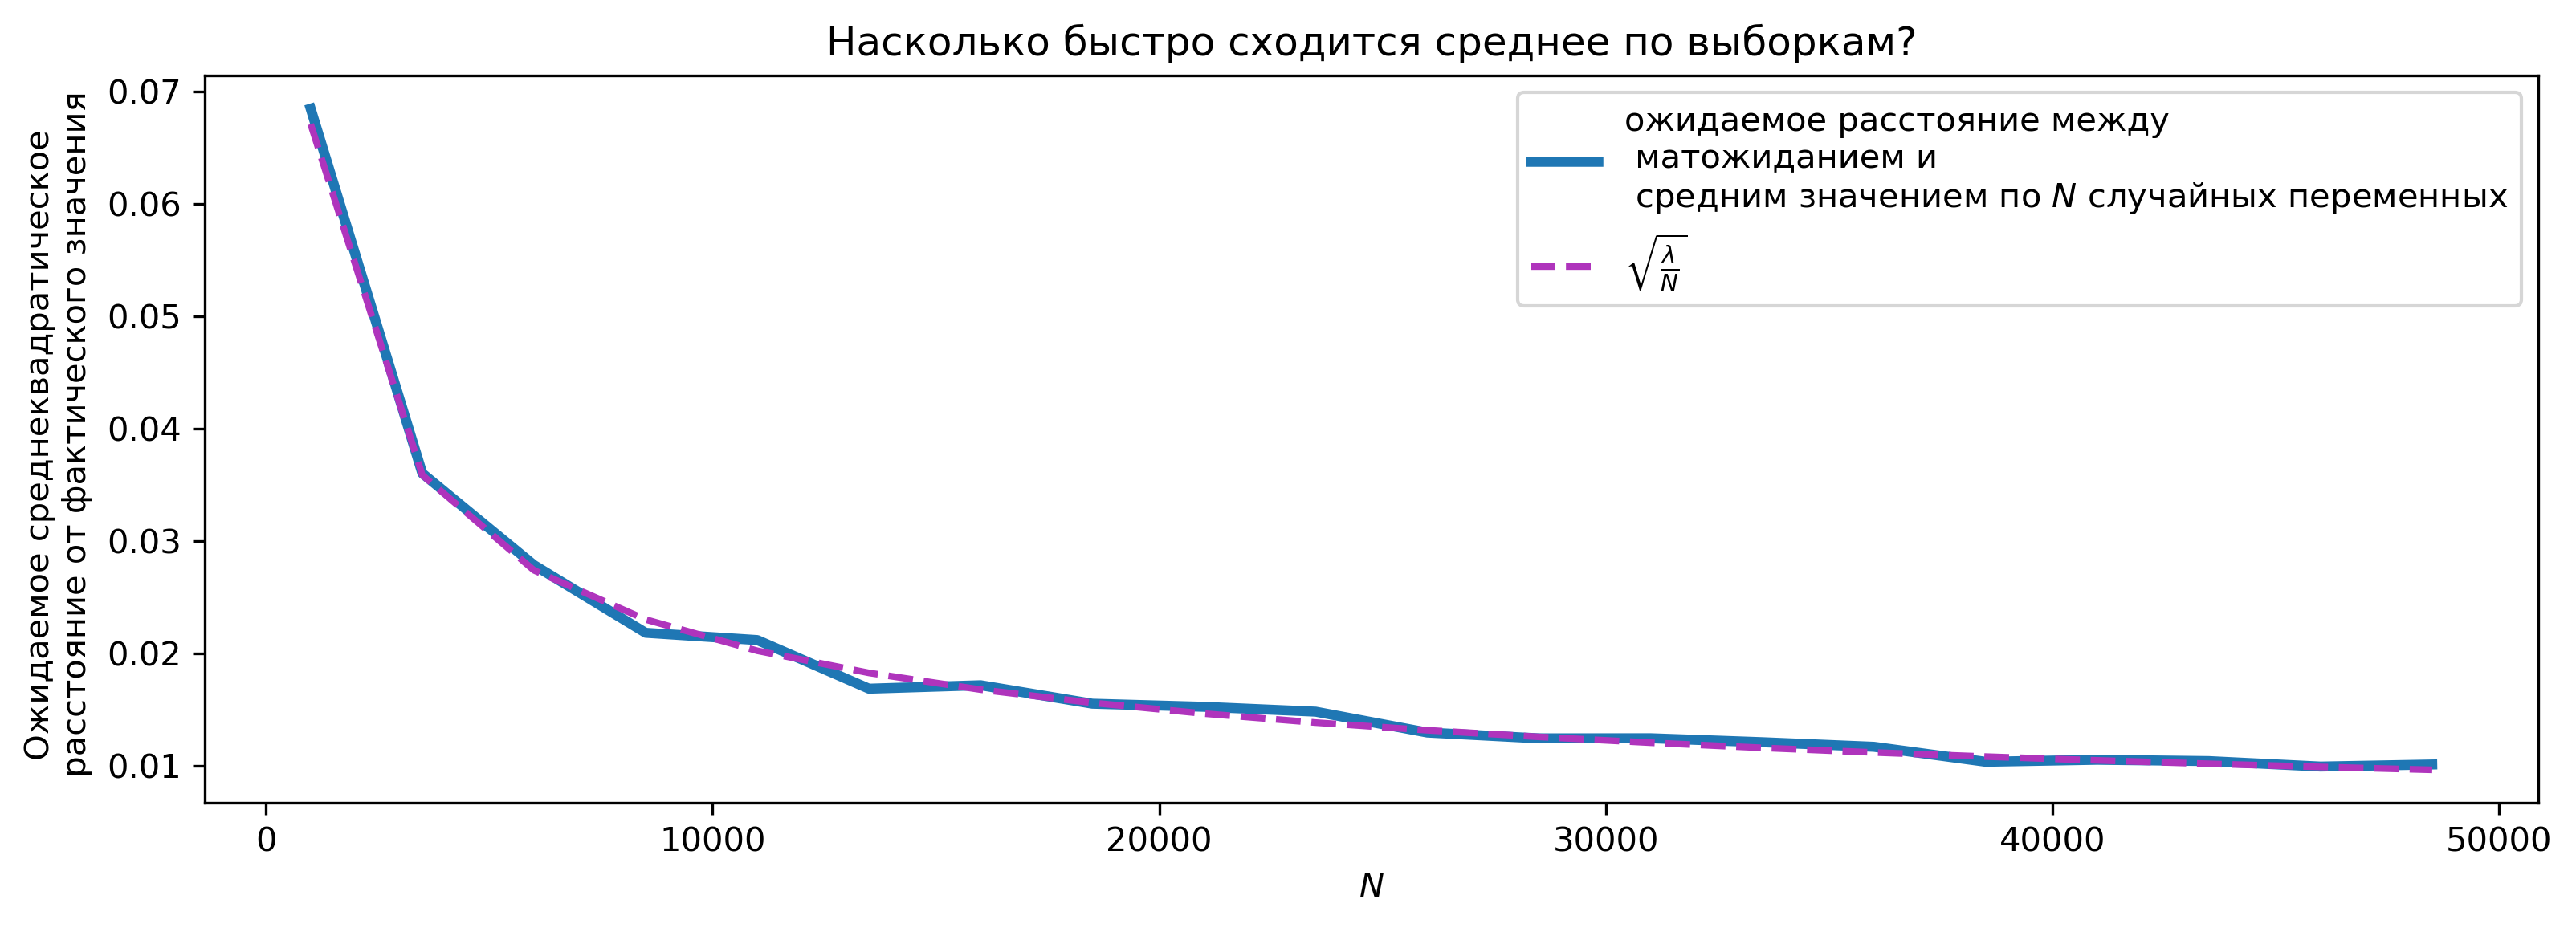

In [44]:
figsize(12.5, 4)

N_Y = 250 # Такое количество выборок будет использовано
          # для приближенного вычисления дисперсии D(N).
    
N_array = np.arange(1000, 50000, 2500) # массив из 20 размеров выборки: 1000, 3500, 6000, 8500, 11000, 13500, 16000, 18500, 21000, 23500, 26000, 28500, 31000, 33500, 36000, 38500, 41000, 43500, 46000, 48500
D_N_results = np.zeros(len(N_array)) # результирующий массив 
poi = pm.rpoisson # генератор Пуассона
lambda_ = 4.5
expected_value = lambda_ # При X ˜ Poi(lambda), E[X] = lambda

def D_N(n):
    """
    Эта функция приближенно вычисляет 
    D_n — среднюю дисперсию при выборке размера n.
    """
    Z = poi(lambda_, size = (n, N_Y)) # матрица n х N_Y случайных чисел Пуассона
    average_Z = Z.mean(axis=0) # средние по всем столбцам этой матрицы
    return np.sqrt(((average_Z - expected_value)**2).mean()) # реализация D(N) ≈ {1/N * ∑{𝑖=1,Nk}(1/N * ∑{𝑖=1,N}𝑍𝑖 - 4.5 )**2}**(1/2)

for i,n in enumerate(N_array):
    D_N_results[i] = D_N(n) # вектор средних кумулятивных дисперсий при выборке размера n
    
plt.xlabel("$N$")
plt.ylabel(u"Ожидаемое среднеквадратическое \n расстояние от фактического значения")
plt.plot(N_array, D_N_results, lw=3,
label=u"ожидаемое расстояние между \n матожиданием и \
          \n средним значением по $N$ случайных переменных")

# В большинстве ситуаций для заданной последовательности 
# случайных переменных, распределенных аналогично Z, 
# темп сходимости к E[Z] согласно закону больших чисел равен: 
# Var(Z)**(1/2)/N**(1/2)

# Убедимся в этом. В случае пуассоновской сл.вел. Var(Z) = λ
# Построим график λ**(1/2)/N**(1/2)
plt.plot(N_array, np.sqrt(expected_value/N_array), lw=2,
         ls="--", color = "#af34bc", label=r"$\sqrt{\frac{\lambda}{N}}$")

plt.title(u"Насколько быстро сходится среднее по выборкам?")
plt.legend();

4.2.3.  Как вычислить Var(Z)

4.2.4.  Математические ожидания и вероятности

Оценка вероятности сл.вел. Z (Z ∼ Распр(Параметры)) с помощью индикаторного подхода: 
          P(Z > x) = ∑{𝑖=1,N}(I_(Z > x)(Z𝑖))

In [46]:
import pymc as pm
N = 100000
print (np.mean([pm.rexponential(0.5)>10 for i in range(N)]))

0.00657


In [48]:
N = 100000
print (np.mean([-1<pm.rnormal(0,1)<1 for i in range(N)]))

0.68332


In [54]:
N = 100000
print (np.mean([0<pm.rbeta(5,1)<.4 for i in range(N)]))

0.00976


4.2.5.   Какое отношение все это имеет к байесовской статистике

# 4.3.  Некорректная работа при малых числах

4.3.1.   Пример: агрегированные географические данные

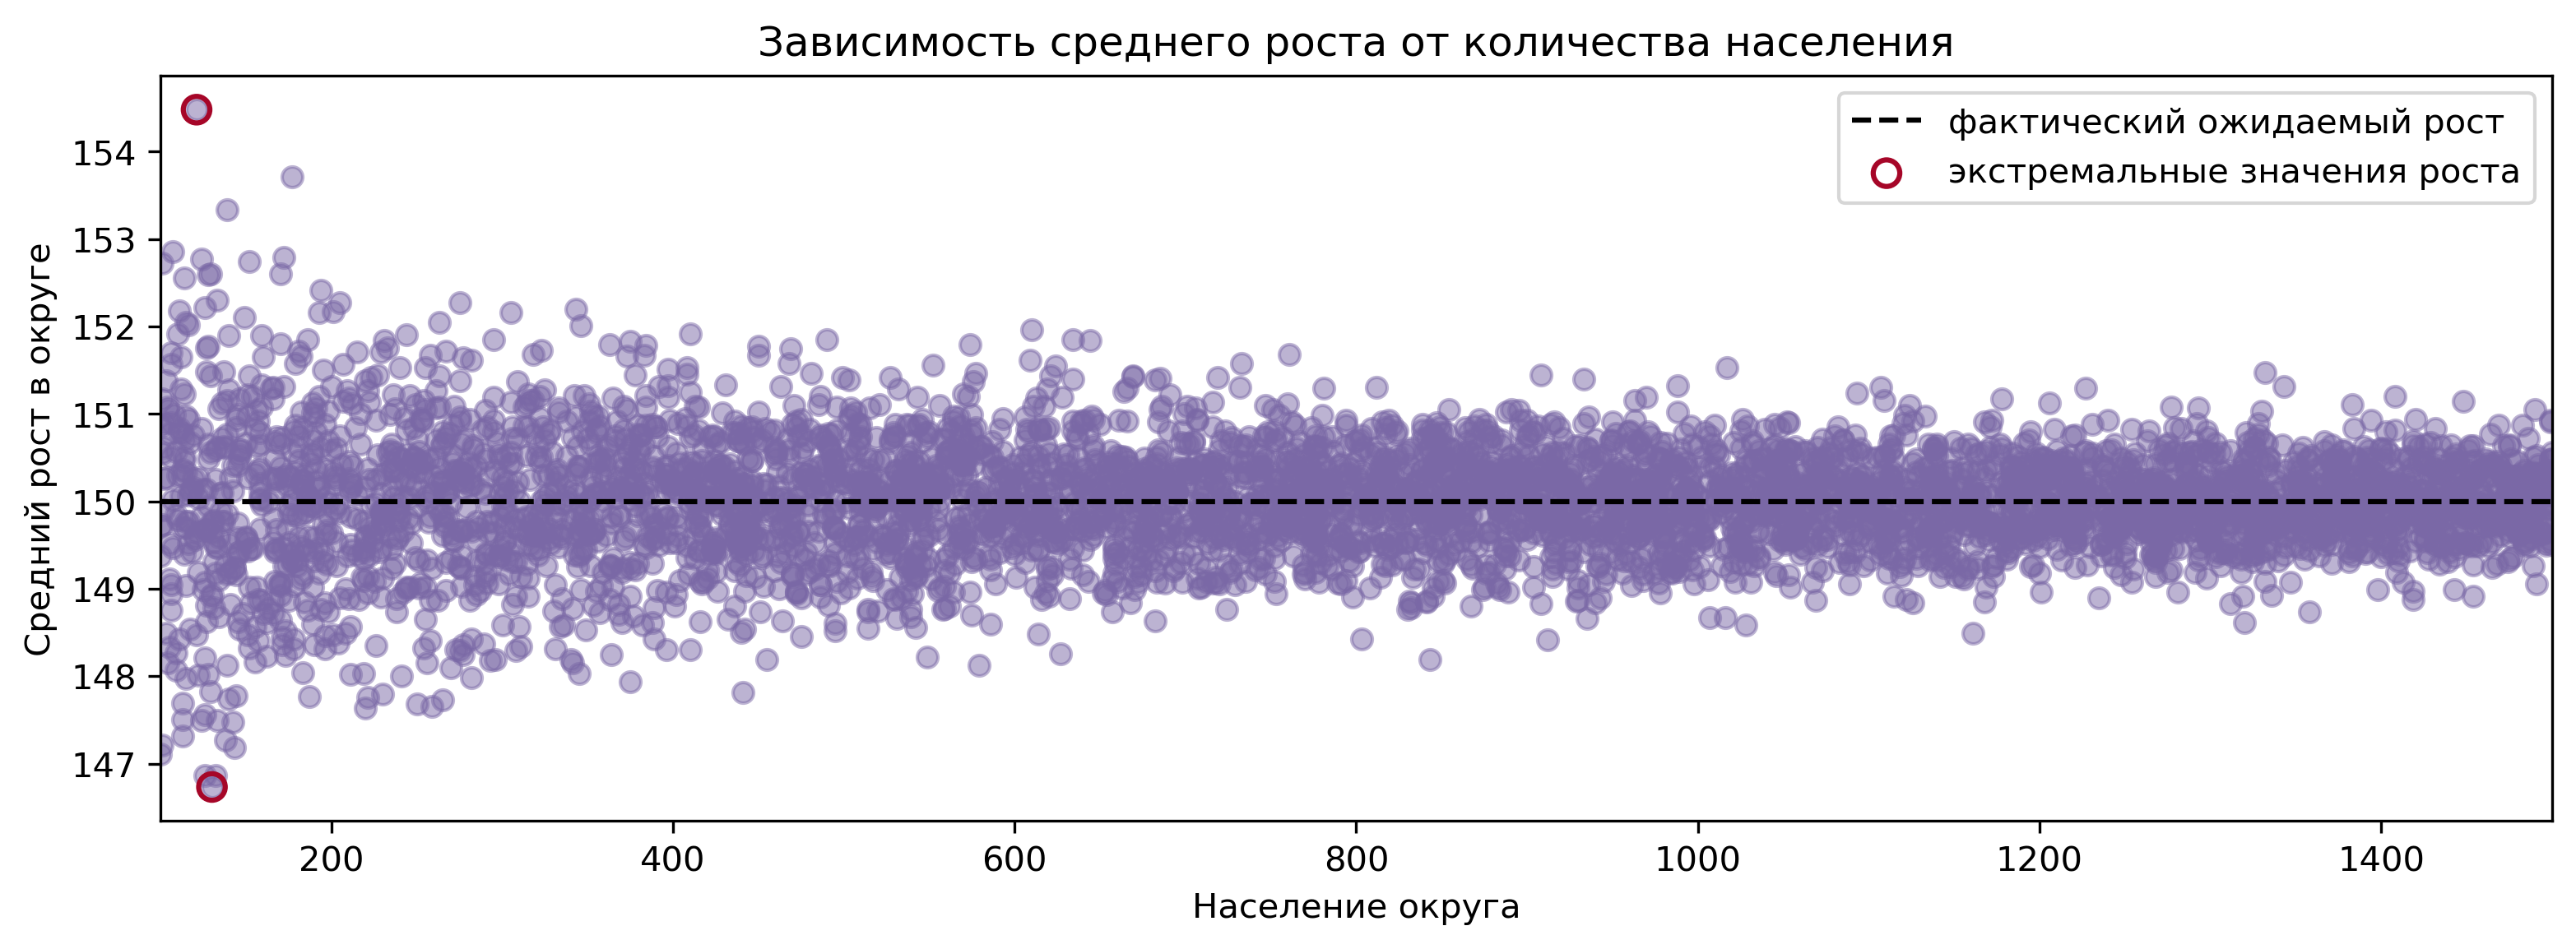

In [29]:
figsize(12.5, 4)
std_height = 15
mean_height = 150
n_counties = 5000
pop_generator = pm.rdiscrete_uniform
norm = pm.rnormal

# Генерируем какие-то фиктивные демографические данные
population = pop_generator(100, 1500, size = n_counties)
average_across_county = np.zeros(n_counties)

for i in range(n_counties):
    # Генерируем данные по людям и вычисляем среднее значение
    average_across_county[i] = norm(mean_height, 1./std_height**2,
                                    size=population[i]).mean()
# Находим округа с явно выделяющимися значениями роста жителей
i_min = np.argmin(average_across_county)
i_max = np.argmax(average_across_county)
# Строим график зависимости количества населения от среднего роста
plt.scatter(population, average_across_county, alpha=0.5, c="#7A68A6")
plt.scatter([population[i_min], population[i_max]],
            [average_across_county[i_min], average_across_county[i_max]],
            s=60, marker="o", facecolors="none",
            edgecolors="#A60628", linewidths=1.5,
            label=u"экстремальные значения роста")
plt.xlim(100, 1500)
plt.title(u"Зависимость среднего роста от количества населения")
plt.xlabel(u"Население округа")
plt.ylabel(u"Средний рост в округе")
plt.plot([100, 1500], [150, 150], color="k", 
         label=u"фактический ожидаемый рост", ls="--")
plt.legend(scatterpoints = 1);

In [30]:
print ("Население 10 наименее 'населенных' округов: ")
print (population[np.argsort(average_across_county)[:10]])
print ()
print ("Население 10 наиболее 'населенных' округов: ")
print (population[np.argsort(-average_across_county)[:10]])

Население 10 наименее 'населенных' округов: 
[130 126 132 100 143 101 138 113 142 124]

Население 10 наиболее 'населенных' округов: 
[121 177 139 107 172 124 152 101 170 129]


4.3.2.   Пример: конкурс Kaggle (перепись населения США)

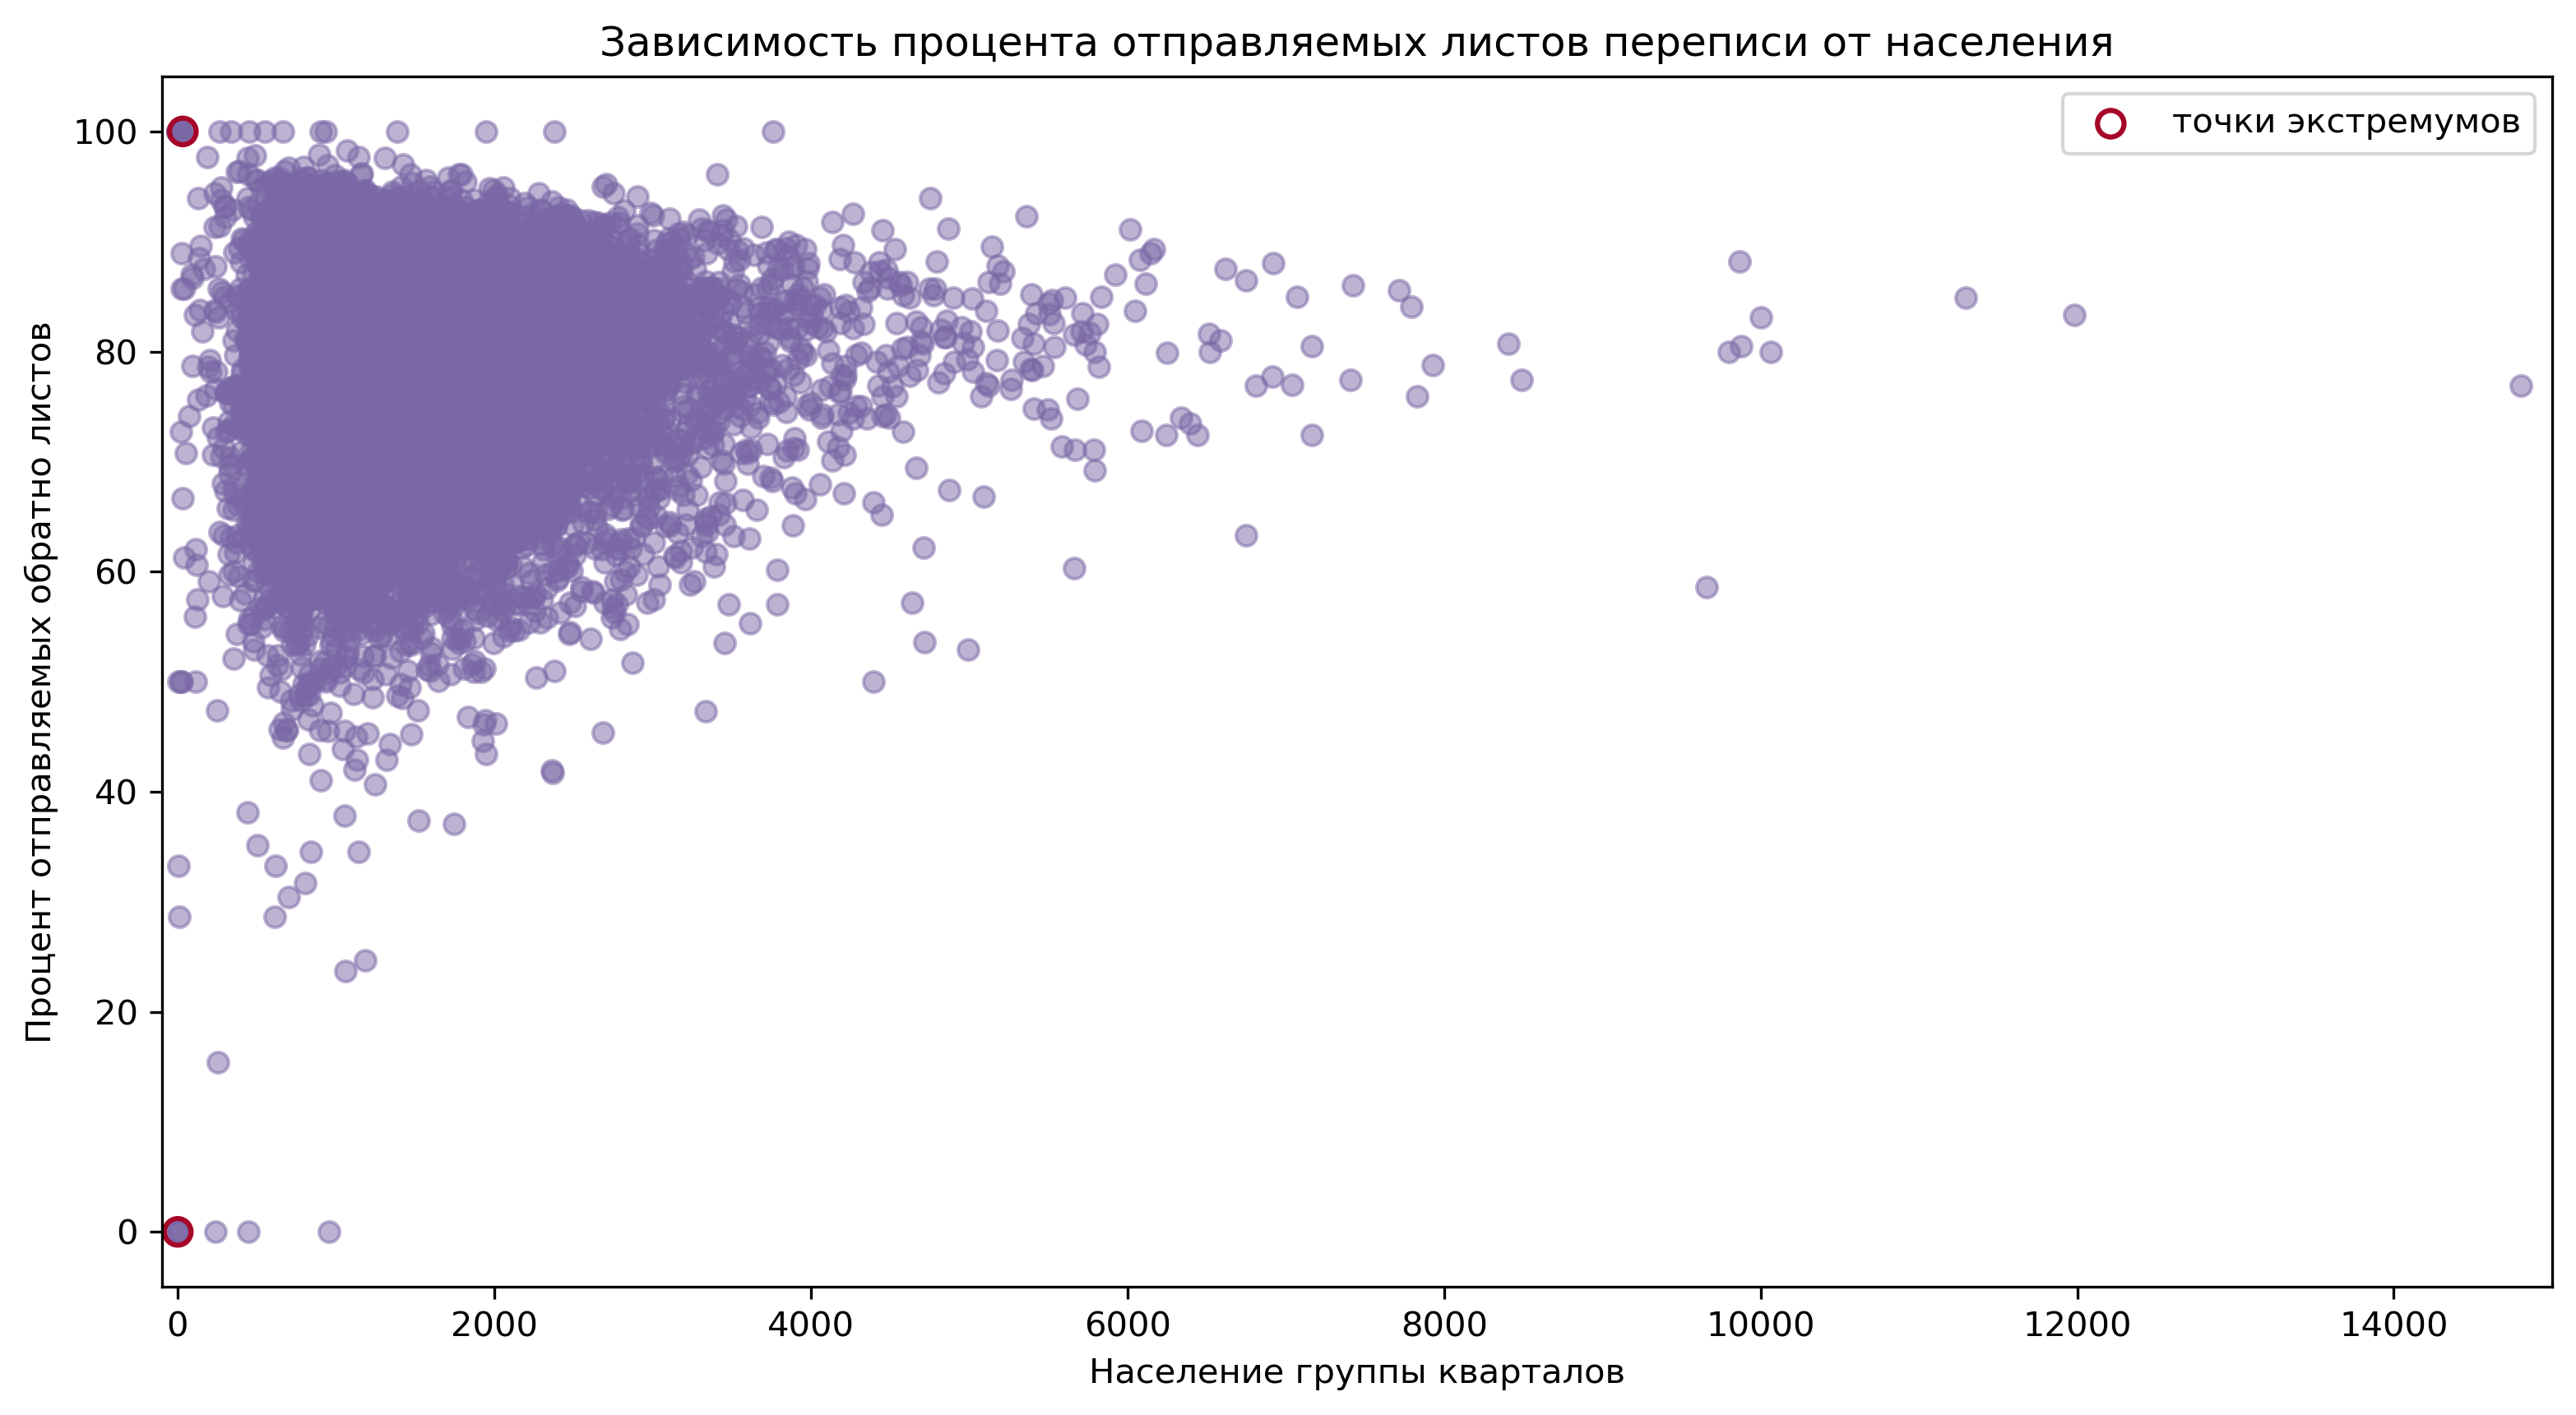

In [42]:
figsize(12.5, 6.5)
data = np.genfromtxt("data/census_data.csv", skip_header=1,
                     delimiter=",")
plt.scatter(data[:,1], data[:,0], alpha=0.5, c="#7A68A6")
plt.title(u"Зависимость процента отправляемых листов переписи от населения")
plt.ylabel(u"Процент отправляемых обратно листов")
plt.xlabel(u"Население группы кварталов")
plt.xlim(-100, 15e3)
plt.ylim(-5, 105)
i_min = np.argmin(data[:,0])
i_max = np.argmax(data[:,0])
plt.scatter([data[i_min,1], data[i_max, 1]],
            [data[i_min,0], data[i_max,0]],
            s=60, marker="o", facecolors="none",
            edgecolors="#A60628", linewidths=1.5,
            label=u"точки экстремумов")
plt.legend(scatterpoints = 1);

In [43]:
data

array([[  74.5,  686. ],
       [  85.8, 1112. ],
       [  77.1, 1409. ],
       ...,
       [  81.1,  821. ],
       [  83.4, 1141. ],
       [  81.4,  569. ]])

4.3.3.  Пример: сортировка комментариев на Reddit

In [33]:
# Установил модуль praw

#import sys
#!{sys.executable} -m pip install praw

In [37]:
import sys

import numpy as np
from IPython.core.display import Image

import praw

#def reddit_scrape():
reddit = praw.Reddit("learnmachinelearning")
subreddit  = reddit.get_subreddit("showerthoughts")

top_submissions = subreddit.get_top(limit=100)

n_sub = int( sys.argv[1] ) if sys.argv[1] else 1

i = 0
while i < n_sub:
    top_submission = next(top_submissions)
    i+=1

top_post = top_submission.title

upvotes = []
downvotes = []
contents = []

for sub in top_submissions:
    try:
        ratio = reddit.get_submission(sub.permalink).upvote_ratio
        ups = int(round((ratio*sub.score)/(2*ratio - 1)) if ratio != 0.5 else round(sub.score/2))
        upvotes.append(ups)
        downvotes.append(ups - sub.score)
        contents.append(sub.title)
    except Exception as e:
        continue
votes = np.array( [ upvotes, downvotes] ).T

NoSectionError: No section: 'learnmachinelearning'
You provided the name of a praw.ini configuration which does not exist.

For help with creating a Reddit instance, visit
https://praw.readthedocs.io/en/latest/code_overview/reddit_instance.html

For help on configuring PRAW, visit
https://praw.readthedocs.io/en/latest/getting_started/configuration.html

In [39]:
praw.Reddit("BayesianModelingandDataAnalysis")

NoSectionError: No section: 'BayesianModelingandDataAnalysis'
You provided the name of a praw.ini configuration which does not exist.

For help with creating a Reddit instance, visit
https://praw.readthedocs.io/en/latest/code_overview/reddit_instance.html

For help on configuring PRAW, visit
https://praw.readthedocs.io/en/latest/getting_started/configuration.html

In [51]:
"""
Contents: массив текстов всех комментариев к картинке Votes: двумерный
массив NumPy голосов "за" и "против" для каждого комментария
"""
n_comments = 77
comments = np.random.randint(n_comments, size=4)


In [52]:
import pymc as pm
def posterior_upvote_ratio(upvotes, downvotes, samples=20000):
    """
    Эта функция принимает в качестве параметров количество
    голосов "за" и "против", полученных конкретным комментарием, 
    а также количество выборок, которое нужно вернуть пользователю.
    Предполагается, что априорное распределение равномерно.
    """
    N = upvotes + downvotes
    upvote_ratio = pm.Uniform("upvote_ratio", 0, 1)
    observations = pm.Binomial("obs", N, upvote_ratio,
                               value=upvotes, observed=True)
    # Обучение; сначала выполняем метод MAP, поскольку он не требует
    # больших вычислительных затрат и приносит определенную пользу.
    map_ = pm.MAP([upvote_ratio, observations]).fit()
    mcmc = pm.MCMC([upvote_ratio, observations])
    mcmc.sample(samples, samples/4)
    return mcmc.trace("upvote_ratio")[:]

In [53]:
figsize(11., 8)
posteriors = []
colors = ["#348ABD", "#A60628", "#7A68A6", "#467821", "#CF4457"]
for i in range(len(comments)):
    j = comments[i]
    label = u'(%d за:%d против)\n%s...'%(votes[j, 0], votes[j,1],
                                         contents[j][:50])
    posteriors.append(posterior_upvote_ratio(votes[j, 0], votes[j,1]))
    plt.hist(posteriors[i], bins=18, density=True, alpha=.9,
             histtype="step", color=colors[i%5], lw=3, label=label)
    plt.hist(posteriors[i], bins=18, density=True, alpha=.2,
             histtype="stepfilled", color=colors[i], lw=3)
plt.legend(loc="upper left")
plt.xlim(0, 1)
plt.ylabel(u"Плотность")
plt.xlabel(u"Вероятность голоса 'за'")
plt.title(u"Апостериорные распределения соотношений голосов 'за' \
          для различных комментариев");

NameError: name 'votes' is not defined

4.3.4.  Сортировка